<img align=left src='keras.png'/>

**Keras** jest to wysokopoziomowe API, napisane w Pythonie które umożliwia nam programowanie biblotek TensorFlow (Google), CNTK (Microsoft), czy Theano (Montreal University). Dodatkowo kod Keras który napisaliśmy raz mozemy wykorzystać z każdą z tych bibliotek.

# Keras - sieć do rozpoznawania cyfr

Baza MNIST zawiera cyfry napisanych ręcznie przez urzedników American Census Bureau i studentów.  

60 tysięcy w zestawie treningowym  
10 tysięcy w zestawie testowym 

Obrazki są przeskalowane do 28x28 pikseli i zapisane jaki plik cvs. Mała próbka poniżej.  

<img align=left src='MnistExamples.png'/>

## Sieć Neuronowa w Keras
Importujemy niezbędne moduły

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,20) #powiekszamy wyświetlane obrazki

from keras.datasets import mnist # importujemy bazę cyfr MNIST
from keras.models import Sequential # importujemy model 
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
%matplotlib inline
from keras.preprocessing import image as kerasimg

### Ładujemy dane - MNIST

In [26]:
nb_classes = 10 # ilość klas do rozpoznania (iność rozpoznawanych cyfr)

# ladujemy dane i przypoisujemy zmiennne do zestawu treningowego i testowego
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train struktura danych", X_train.shape)
print("y_train struktura danych", y_train.shape)

X_train struktura danych (60000, 28, 28)
y_train struktura danych (60000,)


In [27]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

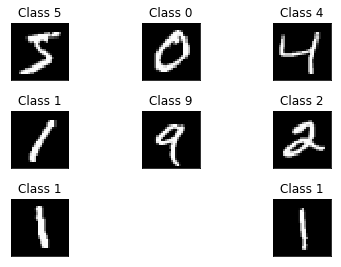

In [44]:


for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

## Formatujemy dane treningowe

Nasza sieć potrzrebuje danych wejsciowy w formie ciągu liczb (jednowymiarowego wektora) dla każdego przykładu .
Musimy przekształcić obrazki (tablice) 28X28 w ciąg 784 liczb.
Musimy również przeskalować dane wejściowe do zakresu **[0-1]** z zakresu [0-255]

In [13]:
X_train = X_train.reshape(60000, 784)   # zmieniamy kształt danych treningowych 28X28 do 784
X_test = X_test.reshape(10000, 784)     # zmieniamy kształt danych testowych 28X28 do 784
X_train = X_train.astype('float32')     # zmieniamy typ danych na zmiennoprzecinkowe
X_test = X_test.astype('float32')       # zmieniamy typ danych na zmiennoprzecinkowe
X_train /= 255                          # przeskalowujemy dane do zakresu [0-1]
X_test /= 255                           # przeskalowujemy dane do zakresu [0-1]
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### Zmieniamy odpowiedzi do: one-hot format

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [14]:
y_train[0]

5

In [15]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [16]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

# Schemat naszej sieci
3 input + 2 warstwy + odpowiedz sieci, fully connected
<img src="tf_network.png" />

In [17]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu')) # Funkcja aktywacyjna, w tym wypadku reLU
                           
model.add(Dropout(0.2))   # Dropout oznacza, ze w kolejnych epokach odrzycamy część neuronów z treningu
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # Dziękifunkcji  "softmax" odpowiedzi są w zakresie [0-1] i sumują się do 1
                                   # czyli mogą być traktowane jako prawdopodobieństwo

## Kompilujemy nasz model
Nasz model zbudowany w Pythonie jest  optymalizowany i kompilowany do kodu maszynowego. 

Do skompilowania naszego modelu Keras potrzebuje również **loss function** i **optimizera**. 
Nasz **loss function** to *categorical crossentropy*, która dobrze nadaje sie do porównywania dwóch rozkładów prawdopodobieństwa.

Odpowiedż naszej sieci to prawdopodobieństwo, ze dana cyfra to któraś z 10 cyfr (np. "na 80% ten obrazek to cyfra '3', na 10% to '8', na 5% to '2', itd"), a targetem jest dystrybucja w której prawidlłowa odpowiedż ma 100% prawdopodobieństwa, a wszystkie inne odpowiedzi 0%.Cross-entropy jest miarą różnicy pomiędzy naszą dystrybucją prawdopodobieństwa, a prawidłową  
[Szczegóły na Wikipedii](https://en.wikipedia.org/wiki/Cross_entropy)

Optimizer decyduje, jak szybko model się uczy i zapobiega jego zatrzymaniu.  
"adam" (Adaptive Moment Estimation) jest dobrym wyborem.

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Trenujemy naszą sieć!

In [19]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4961 - val_loss: 0.1904
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2242 - val_loss: 0.1340
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1710 - val_loss: 0.1111
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1434 - val_loss: 0.0976
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1274 - val_loss: 0.0858
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1142 - val_loss: 0.0890
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1062 - val_loss: 0.0811
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0954 - val_loss: 0.0810
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0876 - val_loss: 0.0833
Epoch

## Sprawdzamy, czy nasza sieć działa

In [20]:
score = model.evaluate(X_test, Y_test,
                       verbose=1)

print('Test loss:', score)


10000/10000 [==============================] - 0s 36us/step
Test loss: 0.0763460151138


### Sprawdzamy czy sieć się czegoś nauczyła

Poniżej przykłady prawidłowych i nieprawidłowych odpowiedzi

In [21]:
# funkcja predict_classeszwraca najbardziej prawdopodobna klase  
# zgodnie z wytrenowanym modelem
predicted_classes = model.predict_classes(X_test)

# sprawdzamy które cyfre odczytalismy prawidlowo
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

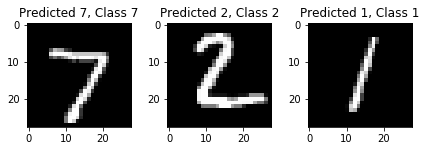

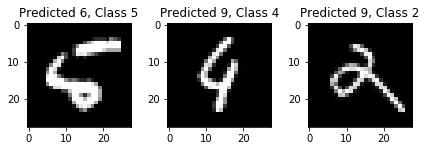

In [39]:
plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()
#     ax = plt.gca()
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()
#     ax = plt.gca()
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)

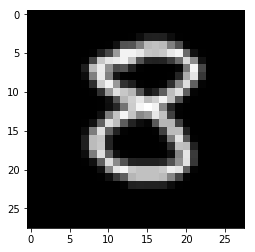

In [63]:
import glob
import imageio

for image_file in glob.glob('C:/Users/ajankows/Desktop/python/obrazki_dane/8.png'):
    
    img_data = imageio.imread(image_file, as_gray=True)

    # zmiana z tablicy 28x28 na listę z 784 wartościami
    img_data  = img_data.reshape(1, 784)
    
    # skalujemy wartosci pikseli do zakresu 0.01 do 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01

plt.imshow(obrazek.reshape(28,28), cmap='Greys', interpolation='None')

In [33]:
odp = model.predict(img)
print(f'odpowiedz sieci zwraca one-hot encoding: {odp}')
odp = list(odp[0])
for i, j in enumerate(odp):
    if j == 1:
        print(f'odpowiedz sieci to: {i}')

odpowiedz sieci zwraca one-hot encoding: [[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]
odpowiedz sieci to: 3


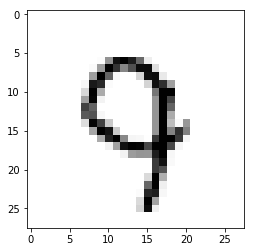

In [57]:
numerek = 999
plt.imshow(X_test[numerek].reshape(28,28), cmap='Greys', interpolation='None')


In [62]:
test = X_test[numerek].reshape(1, 784)
predicted_c = model.predict_classes(test)
predict = model.predict(test)
for i in list(predict[0]):
    print(f'{i:.3f}')
# odp = model.predict(test)
# print(f'odpowiedz sieci zwraca one-hot encoding: {odp}')
print(predicted_c)

0.000
0.000
0.000
0.000
0.001
0.000
0.000
0.016
0.000
0.983
[9]


(28, 28, 1)


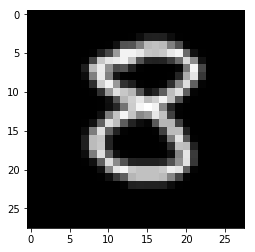

In [52]:
from keras.preprocessing import image
image_file ='C:/Users/ajankows/Desktop/python/obrazki_dane/8.png'

img = image.load_img(path=image_file,grayscale=True,target_size=(28,28))
img = image.img_to_array(img)

print(img.shape)

# reshape from 28x28 to list of 784 values, invert values
obrazek = img_data
img_data  = img.reshape(784)

# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01

plt.imshow(obrazek.reshape(28,28), cmap='Greys', interpolation='None')

In [53]:
from keras.preprocessing import image
def prepare_img(picture_path):
    img = image.load_img(path=picture_path,grayscale=True,target_size=(28,28))
    img = 255 - image.img_to_array(img)
    test_img = img.reshape((1,28,28,1))
    return test_img